In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [2]:
from pytrends.request import TrendReq
from pytrends import dailydata

In [3]:
# def get_searches(key_word):
#     df = dailydata.get_daily_data(key_word, 2020, 1, 2021, 12, geo = 'US')    
#     return df
# fever_df=get_searches('Fever')
# cough_df=get_searches('Cough')
# sanitizer_df=get_searches('Sanitizer')
# mask_df=get_searches('mask')
# fever_df.to_csv(r'./data/fever.csv')
# cough_df.to_csv(r'./data/cough.csv')
# sanitizer_df.to_csv(r'./data/sanitizer.csv')
# mask_df.to_csv(r'./data/mask.csv')

# Load cached data
# fever_df = pd.read_csv(r'./data/fever.csv')
# cough_df = pd.read_csv(r'./data/cough.csv')
# sanitizer_df = pd.read_csv(r'./data/sanitizer.csv')
# mask_df = pd.read_csv(r'./data/mask.csv')

In [4]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [5]:
dict_data = {}

def load_data(df_str):
    df = pd.read_csv(rf'./data/{df_str}.csv')
    unscaled_col = [col for col in df.columns if 'unscaled' in col][0]
    df.date = df.date.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%m/%d/%y'))
    df = df[['date', unscaled_col]]
    return df

def prepare_data(data_dict, cases_data):
    for df_str, df in data_dict.items():
        dates_list = [dat for dat in confirmed_us.date.unique() if dat in df.date.unique()]
        cases_data = cases_data.merge(df[df.date.isin(dates_list)], how='inner', on='date')
    return cases_data

list_str_data = ['fever', 'cough', 'sanitizer', 'mask']       

for str_data in list_str_data:
    dict_data[str_data] = load_data(str_data)

In [6]:
dates_list = [d for d in dict_data['fever'].date.unique() if d in confirmed_cases.T.index]

In [7]:
confirmed_us = confirmed_cases[confirmed_cases['Country/Region'] == 'US'][dates_list].T
confirmed_us.columns = ['Cases']
confirmed_us = confirmed_us.reset_index().rename(columns={'index': 'date'})
dict_cases = {}
for idx in range(1, len(confirmed_us))[::-1]:
    dict_cases[idx] = confirmed_us.loc[idx,:].Cases - confirmed_us.loc[idx-1,:].Cases
dict_cases[0] = 0
confirmed_us['cases_daily'] = confirmed_us.index.map(dict_cases).to_list()
confirmed_us = confirmed_us.drop(index=0).reset_index(drop=True)

In [8]:
final_data = prepare_data(dict_data, confirmed_us.drop('Cases', axis=1))

In [9]:
final_data.head()

,date,cases_daily,Fever_unscaled,Cough_unscaled,Sanitizer_unscaled,mask_unscaled
0,10/11/20,46832,87,81,82,77
1,10/12/20,41732,81,91,95,66
2,10/13/20,51091,75,87,79,70
3,10/14/20,59302,90,91,88,69
4,10/15/20,65114,88,86,100,78


In [12]:
final_data.set_index('date').corr()

,cases_daily,Fever_unscaled,Cough_unscaled,Sanitizer_unscaled,mask_unscaled
cases_daily,1.000000,-0.081721,-0.229427,0.055179,-0.086820
Fever_unscaled,-0.081721,1.000000,0.420358,0.191412,0.202403
Cough_unscaled,-0.229427,0.420358,1.000000,0.290676,0.234069
Sanitizer_unscaled,0.055179,0.191412,0.290676,1.000000,0.284239
mask_unscaled,-0.086820,0.202403,0.234069,0.284239,1.000000


In [40]:
final_data.head()

,date,cases_daily,Fever_unscaled,Cough_unscaled,Sanitizer_unscaled,mask_unscaled
0,10/11/20,46832,87,81,82,77
1,10/12/20,41732,81,91,95,66
2,10/13/20,51091,75,87,79,70
3,10/14/20,59302,90,91,88,69
4,10/15/20,65114,88,86,100,78


In [42]:
dates = final_data.date

In [43]:
total_cases = final_data.cases_daily

In [44]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
total_cases = np.array(total_cases).reshape(-1, 1)

In [45]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [46]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [20]:
dates

0      10/11/20
1      10/12/20
2      10/13/20
3      10/14/20
4      10/15/20
         ...   
110    12/13/21
111    12/14/21
112    12/15/21
113    12/16/21
114    12/17/21
Name: date, Length: 115, dtype: object

In [21]:
start = '11/10/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [22]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_cases, test_size=0.25, shuffle=False) 

In [23]:
# transform data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [24]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 3599978.9290956855
MSE: 17848030162151.234


C:\Users\kolli\anaconda3\envs\eas503\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


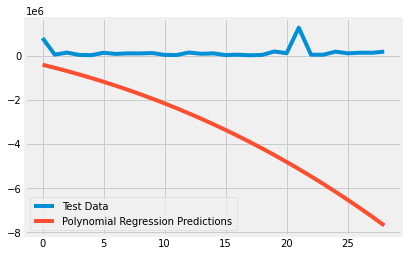

In [25]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [26]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

C:\Users\kolli\anaconda3\envs\eas503\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 309210.4914351731
MSE: 178046020739.13132


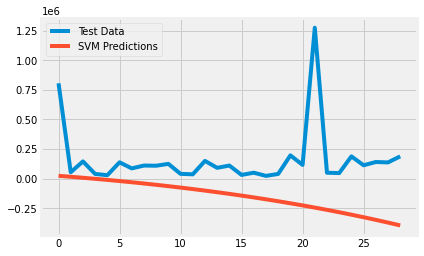

In [27]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

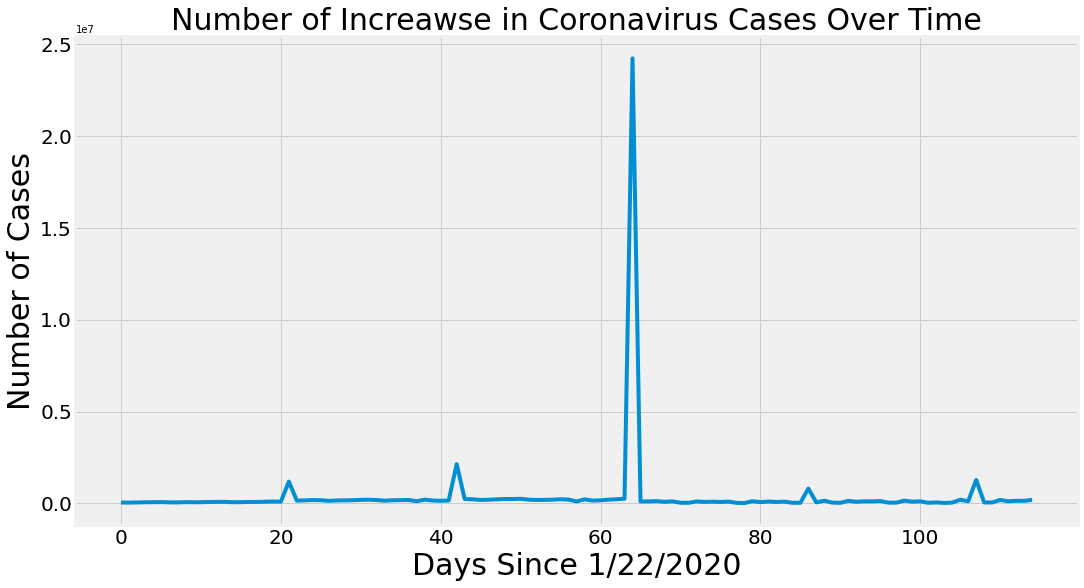

In [32]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_cases)
plt.title('Number of Increawse in Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [34]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases Worldwide': np.round(linear_pred[-20:])})
poly_df

,Date,Predicted number of Confirmed Cases Worldwide
0,03/05/2021,-8098876.0
1,03/06/2021,-8522198.0
2,03/07/2021,-8957677.0
3,03/08/2021,-9405469.0
4,03/09/2021,-9865733.0
5,03/10/2021,-10338625.0
6,03/11/2021,-10824304.0
7,03/12/2021,-11322927.0
8,03/13/2021,-11834651.0
9,03/14/2021,-12359634.0


In [35]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-20:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,03/05/2021,-417558.0
1,03/06/2021,-443125.0
2,03/07/2021,-469590.0
3,03/08/2021,-496975.0
4,03/09/2021,-525304.0
5,03/10/2021,-554602.0
6,03/11/2021,-584892.0
7,03/12/2021,-616201.0
8,03/13/2021,-648553.0
9,03/14/2021,-681975.0
